In [3]:
import numpy as np
import math
import random
from prettytable import PrettyTable
import matplotlib.pyplot as plt

## Testovací funkce

In [4]:
# 1st DeJong function

def dejong1(x):
    return sum([i**2 for i in x])

# 2st DeJong function
# f2(x)=sum(100·(x(i+1)-x(i)^2)^2+(1-x(i))^2)
#   i=1:n-1; -2.048<=x(i)<=2.048.
def dejong2(x):
    d = len(x)
    suma = 0
    i=0
    for i in range(d-1):
        xi = x[i]
        xnext = x[i+1]
        new = 100 * (xnext - xi**2)**2 + (xi-1)**2
        suma += new
    return suma 

# Schweffel function
def schweffel(x):
    d = len(x)
    suma = 0
    for i in range(d):
        xi = x[i]
        suma += xi * math.sin(math.sqrt(abs(xi)))
    return (418.9829 * d - suma)
    
    

## Algoritmy

In [69]:
# Random Search

def random_search(n_iterations, cost_func, dimensions, area ):
    best_solution = None
    best_fitness = math.inf
    history = [best_fitness]

    for i in range(n_iterations):
        solution = [np.random.uniform(-(area), area) for i in range(dimensions)]
        fitness = cost_func(solution)

        if fitness < best_fitness:
            best_solution = solution
            best_fitness = fitness
            
        history.append(best_fitness)
            
    return history


# Simulované žíhání

def simulated_annealing(n_iterations, cost_function, dimensions, n_neighbours, area, max_temp, min_temp, cooling_decr):
    starting_vector = np.random.uniform(-area, area, dimensions)
    current_solution = starting_vector
    current_fitness = cost_function(current_solution)
    history = [current_fitness]
    T = max_temp

    n_iterations = int(n_iterations/n_neighbours)


    for i in range(n_iterations):
        neighbours = generate_neighbors(current_solution, n_neighbours, area)
        for neighbour_solution in neighbours:
            neighbour_fitness = cost_function(neighbour_solution) 
            delta_f = neighbour_fitness - current_fitness
            if(delta_f < 0):
                current_fitness = neighbour_fitness
                current_solution = neighbour_solution
            elif(neighbour_fitness < current_fitness):
                current_fitness = neighbour_fitness
                current_solution = neighbour_solution
            elif(random.random() < math.exp(-delta_f/T)): #volani metropolise
                current_fitness = neighbour_fitness
                current_solution = neighbour_solution
            history.append(current_fitness) # pro 10 000 hodnot v historii
        #history.append(current_fitness)
        T = max_temp*cooling_decr**i
        if(T < min_temp):
            T = min_temp
    return history


def generate_neighbors(current_solution, n_neighbors, area):
    neighbors = []
    min_value = -area
    max_value = area
    step_10_percent = 0.1 * (max_value - min_value)
    sigma = step_10_percent/2
    for i in range(n_neighbors):
        neighbor = current_solution + np.random.normal(0, sigma, len(current_solution))
        while not all((neighbor >= -(area)) & (neighbor <= area)):
            neighbor = np.clip(neighbor, min_value, max_value)
        neighbors.append(neighbor)
    return neighbors


## Výseldky

In [109]:
def comparison(n_iterations, dimensions , cost_function, area, n_neighbours, cooling_decr, title, ):
    max_temp = 1000
    min_temp = 0.01

    RS_history = []
    SA_history = []

    for i in range(30):
        rs_found_solutions = random_search(n_iterations, cost_function, dimensions, area)
        RS_history.append(rs_found_solutions)

        sa_found_solutions = simulated_annealing(n_iterations, cost_function, dimensions, n_neighbours, area, max_temp, min_temp, cooling_decr)
        SA_history.append(sa_found_solutions)

#Min, Max, Mean, Median a Std. Dev. hodnoty a porovnejte tyto hodnoty mezi 2 algoritmy
#pro každou zkušební funkci. Musíte také potvrdit vaše výsledky vykreslením nejlepších řešení
#z každé iterace - tj. konvergenční graf. Vaším úkolem je vykreslit:

    RS_min = [np.min(min_sol) for min_sol in RS_history]
    RS_max = [np.max(max_sol) for max_sol in RS_history]
    #RS_mean = [np.mean(mean_sol) for mean_sol in RS_history]
   


    RS_median = [np.median(median_sol) for median_sol in RS_history]
    RS_std_dev = [np.std(std_sol) for std_sol in RS_history]

    SA_min = [np.min(min_sol) for min_sol in SA_history]
    SA_max = [np.max(max_sol) for max_sol in SA_history]
    SA_mean = [np.mean(mean_sol) for mean_sol in SA_history]
    SA_median = [np.median(median_sol) for median_sol in SA_history]
    SA_std_dev = [np.std(std_sol) for std_sol in SA_history]

#Konvergenční graf všech 30 běhů v jednom grafu (30 čar v 1 grafu) - celkem 12 grafů
#(2 algoritmy x 3 funkce x 2 nastavení dimenze)
#• Konvergenční graf průměrného nejlepšího výsledků - tj. Průměrné nejlepší řešení v
#každé iteraci (jeden graf – z těch 30 čar výše uděláte v každé iteraci průměr) - celkem
#12 grafů (2 algoritmy x 3 funkce x 2 nastavení dimenze)
#• Porovnání těchto průměrných konvergencí pro 2 algoritmy v jednom grafu pro
#každou testovací funkci - celkem 6 grafů (3 funkce x 2 nastavení dimenze

#2 grafy jeden pro rs a pro sa pro 30 car
    
    # Vykreslení grafu pro RS_history
    plt.figure(figsize=(5, 2))
    for i in range(len(RS_history)):
        iteration_data = RS_history[i]
        plt.plot(iteration_data) #  plt.plot(iteration_data, label=f"It {i+1}") 

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Random Search")
    #plt.legend()
    plt.grid(True)
    plt.show()

    # Vykreslení grafu pro SA_history
    plt.figure(figsize=(5, 2))
    for i in range(len(SA_history)):
        iteration_data = SA_history[i]
        plt.plot(iteration_data) #  plt.plot(iteration_data, label=f"It {i+1}")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Simulated Annealing")
    #plt.legend()
    plt.grid(True)
    plt.show()
    
    # Vykreslení průměrného nejepšího řešení 

    # Vykreslení grafu pro RS_mean 

    RS_mean = [np.mean(pair) for pair in zip(*RS_history)]

    plt.figure(figsize=(5, 2))
    plt.plot(RS_mean, label="RS mean")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Random Search")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Vykreslení grafu pro SA_mean

    SA_mean = [np.mean(pair) for pair in zip(*SA_history)]

    plt.figure(figsize=(5, 2))
    plt.plot(SA_mean, label= "SA mean")

    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Simulated Annealing")
    plt.legend()
    plt.grid(True)
    plt.show()

    #Porovnání těchto průměrných konvergencí pro 2 algoritmy v jednom grafu

    plt.figure(figsize=(5, 2))
    plt.plot(SA_mean, label= "SA mean")
    plt.plot(RS_mean, label="RS mean")
    
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(title + " - Comparison of SA and RS")
    plt.legend()
    plt.grid(True)
    plt.show()





## 1st DeJong function

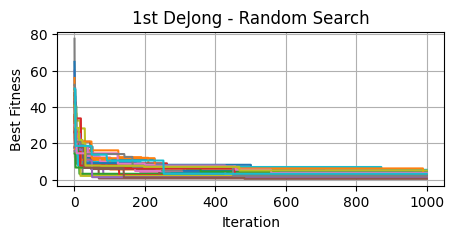

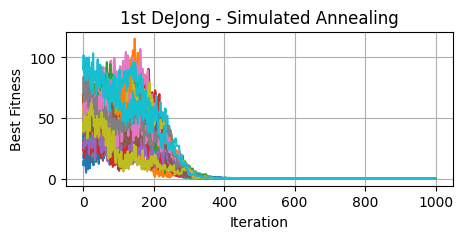

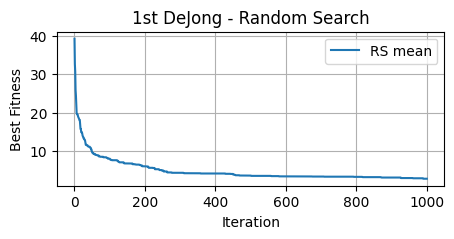

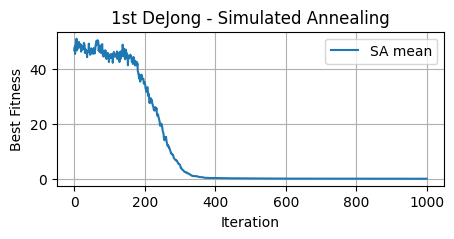

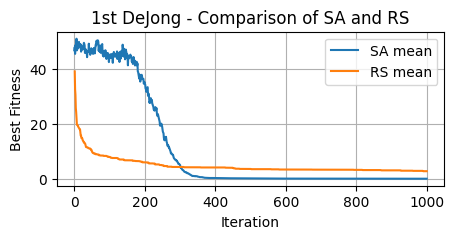

In [112]:
n_iterations = 1000
dimensions = 5
cost_func = dejong1
area_edges = 5.12
n_of_neighbours = 10
cooling_decr = 0.78
title = "1st DeJong"
comparison(n_iterations, dimensions,cost_func,area_edges,n_of_neighbours, cooling_decr, title)